# **Data Preprocesing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("C:/Users/Anish Kundu/Downloads/ML Project Dataset/ObesityDataSet.csv")

# Separate features and target variable
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Replace NaN values in non-numeric columns with random 'yes' or 'no'
non_numeric_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE']
for col in non_numeric_cols:
    nan_indices = X[col].isna()
    X.loc[nan_indices, col] = np.random.choice(['yes', 'no'], size=nan_indices.sum())

# Impute missing values with mean for numeric columns
numeric_cols = ['FCVC', 'NCP', 'CH2O', 'FAF']
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# One-hot encode all categorical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(X[categorical_cols])
encoded_cols = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical columns with numeric columns
X_encoded = pd.concat([X.drop(columns=categorical_cols), encoded_cols], axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numeric features using StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Display the preprocessed dataset
X_encoded.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.000000,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.000000,3.0,3.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.414899,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.000000,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.000000,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Model Build**

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train models
random_forest_model = RandomForestClassifier(random_state=42)
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Dictionary to hold the models
models = {
    "Random Forest": random_forest_model,
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Gradient Boosting": gradient_boosting_model
}

# Train and print status
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print("Done!")

# Evaluate models
for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Training Random Forest...
Done!
Training Logistic Regression...


C:\Users\Anish Kundu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done!
Training Decision Tree...
Done!
Training Gradient Boosting...
Done!
Evaluating Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.86      0.89      0.87        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.95      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.86      0.87        56
Overweight_Level_II       0.90      0.94      0.92        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

[[54  2  0  0  0  0  0]
 [ 1 55  0  0  0  3  3]
 [ 0  1 73  3  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  6  0  0  0 48  1]
 [ 0  0  0  0  0  3 47]]


Evaluating Logistic Regression:
                     pr

In [14]:
trained_model

(RandomForestClassifier(random_state=42),
 LogisticRegression(max_iter=1000, random_state=42),
 DecisionTreeClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42))

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Train models
random_forest_model = RandomForestClassifier(random_state=42)
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Dictionary to hold the models
models = {
    "Random Forest": random_forest_model,
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Gradient Boosting": gradient_boosting_model
}

# Train and print status
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print("Done!")

# Evaluate models
for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    g_mean = balanced_accuracy_score(y_test, y_pred)
    print(f"G-Mean: {g_mean}")
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Training Random Forest...
Done!
Training Logistic Regression...


C:\Users\Anish Kundu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done!
Training Decision Tree...
Done!
Training Gradient Boosting...
Done!
Evaluating Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.86      0.89      0.87        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.95      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.86      0.87        56
Overweight_Level_II       0.90      0.94      0.92        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

G-Mean: 0.938168771744173


[[54  2  0  0  0  0  0]
 [ 1 55  0  0  0  3  3]
 [ 0  1 73  3  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  6  0  0  0 48  1]
 [ 0  0  0  0  0  3 47]]


Evaluating Logistic Regress

# **Test Sample**

In [4]:
import pandas as pd

# Create a DataFrame for the sample test set
sample_test_data = pd.DataFrame({
    'Gender': ['Female'],
    'Age': [21],
    'Height': [1.62],
    'Weight': [64],
    'family_history_with_overweight': ['yes'],
    'FAVC': ['no'],
    'FCVC': [2],
    'NCP': [3],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2],
    'SCC': ['no'],
    'FAF': [0],
    'TUE': [1],
    'CALC': ['no'],
    'MTRANS': ['Public_Transportation']
})

# Display the sample test set
print("Sample Test Set:")
print(sample_test_data)

Sample Test Set:
   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   

        CAEC SMOKE  CH2O SCC  FAF  TUE CALC                 MTRANS  
0  Sometimes    no     2  no    0    1   no  Public_Transportation  


In [5]:
import pandas as pd

# Preprocess the sample test set
sample_test_data_encoded = pd.get_dummies(sample_test_data)

# Ensure that the columns match the columns used during training
missing_cols = set(X_encoded.columns) - set(sample_test_data_encoded.columns)
for col in missing_cols:
    sample_test_data_encoded[col] = 0

# Reorder the columns to match the order used during training
sample_test_data_encoded = sample_test_data_encoded[X_encoded.columns]

# Use the trained models to make predictions for the preprocessed sample test set
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(sample_test_data_encoded)

# Display the predicted values for the target set ('NObeyesdad')
print("Predicted values for the target set ('NObeyesdad'):")
for name, preds in predictions.items():
    print(f"{name}: {preds[0]}")


Predicted values for the target set ('NObeyesdad'):
Random Forest: Overweight_Level_II
Logistic Regression: Overweight_Level_II
Decision Tree: Normal_Weight
Gradient Boosting: Normal_Weight


In [6]:
models

{'Random Forest': RandomForestClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your model predictions stored in y_pred
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'plt' is not defined

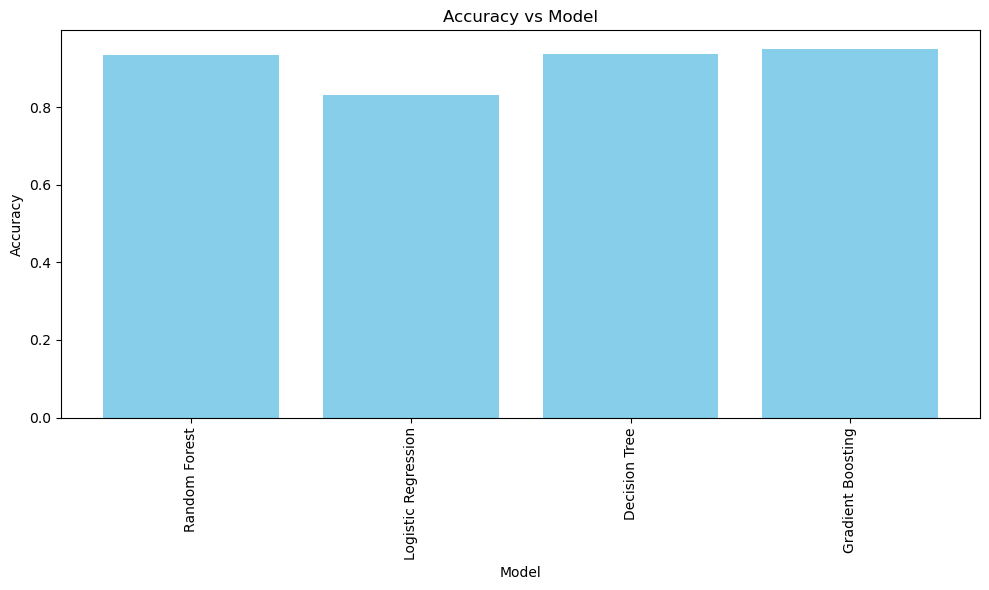

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy scores for each model
accuracy_scores = []

# Loop through each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store accuracy score in the list
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\Anish Kundu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


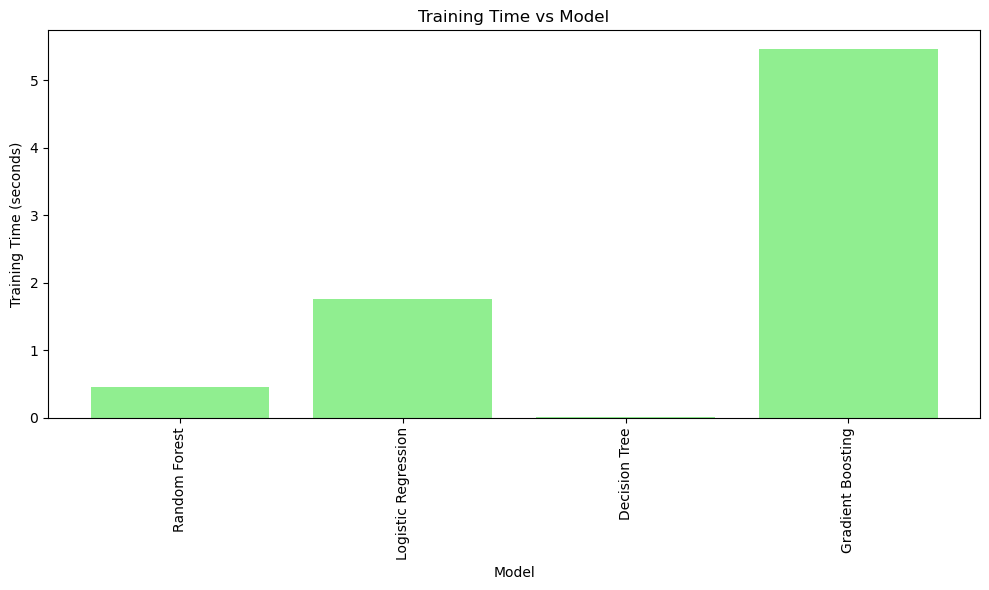

In [ ]:
import time
import matplotlib.pyplot as plt

# Dictionary to store training times for each model
training_times = []

# Loop through each model
for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    # Calculate training time
    training_time = end_time - start_time
    # Store training time in the list
    training_times.append(training_time)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), training_times, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
# Print the number of instances (samples) and features in the dataset
print(f"Number of instances (samples): {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")


Number of instances (samples): 2111
Number of features: 16


In [ ]:
# For independent variables (features)
independent_variable_types = X.dtypes

# For dependent variable (target)
dependent_variable_type = y.dtypes

print("Data types of independent variables (features):")
print(independent_variable_types)

print("\nData type of dependent variable (target):")
print(dependent_variable_type)


Data types of independent variables (features):
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

Data type of dependent variable (target):
object


In [ ]:
# Describe the dataset to check data scale
data_description = X.describe()

print("Summary statistics for the dataset:")
print(data_description)


Summary statistics for the dataset:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.414899     2.685737   
std       6.345968     0.093305    26.191172     0.521578     0.756246   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.685737   
50%      22.777890     1.700499    83.000000     2.414899     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.004874     1.013770     0.657866  
std       0.595400     0.830594     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.636326     0.170466     0.000000  
50%       2.000